# Multiple Regression

So far, the course has considered a single continuous predictor attribute. That is, in the following equation, we have only considered a single $X$ attribute.

$$
Y = \beta_{0} + \beta_{1} X + \epsilon
$$

However, there are many situations where we would want more than one predictor attribute in the data. We can simply add another predictor attribute and this would look like the following regression equation. 

$$
Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \epsilon
$$

where $X_{1}$ and $X_{2}$ are two different predictors attributes. Let's dive right into some data to explore this a bit more. 

## Data

For this portion, using data from the college scorecard representing information about higher education institutions. 

In [1]:
library(tidyverse)
library(ggformula)

theme_set(theme_bw(base_size = 18))

college <- read_csv("https://raw.githubusercontent.com/lebebr01/statthink/main/data-raw/College-scorecard-4143.csv")

head(college)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: ggstance


Attaching package: 'ggstance'


The following objects are masked from 'package:ggplot2':

    GeomErrorbarh, geom_errorbarh


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Rows: 7058 Columns: 16

-- Column specification ----

instnm,city,stabbr,preddeg,region,locale,adm_rate,actcmmid,ugds,costt4_a,costt4_p,tuitionfee_in,tuitionfee_out,debt_mdn,grad_debt_mdn,female
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama A & M University,Normal,AL,Bachelor Degree,Southeast,City: Midsize,0.9027,18,4824,22886,NA,9857,18236,13246.0,32750,0.5640301
University of Alabama at Birmingham,Birmingham,AL,Bachelor Degree,Southeast,City: Midsize,0.9181,25,12866,24129,NA,8328,19032,14979.5,21833,0.6390907
Amridge University,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,NA,NA,322,15080,NA,6900,6900,10430.0,22890,0.6486486
University of Alabama in Huntsville,Huntsville,AL,Bachelor Degree,Southeast,City: Midsize,0.8123,28,6917,22108,NA,10280,21480,13522.0,22647,0.4763499
Alabama State University,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,0.9787,18,4189,19413,NA,11068,19396,15738.0,31500,0.6134185
The University of Alabama,Tuscaloosa,AL,Bachelor Degree,Southeast,City: Midsize,0.5330,28,32387,28836,NA,10780,28100,17340.0,23290,0.6152524


## Question

Suppose we were interested in exploring admission rates and which attributes helped to explain variation in admission rates. 

Warning message:
"Removed 5039 rows containing non-finite values (stat_density)."


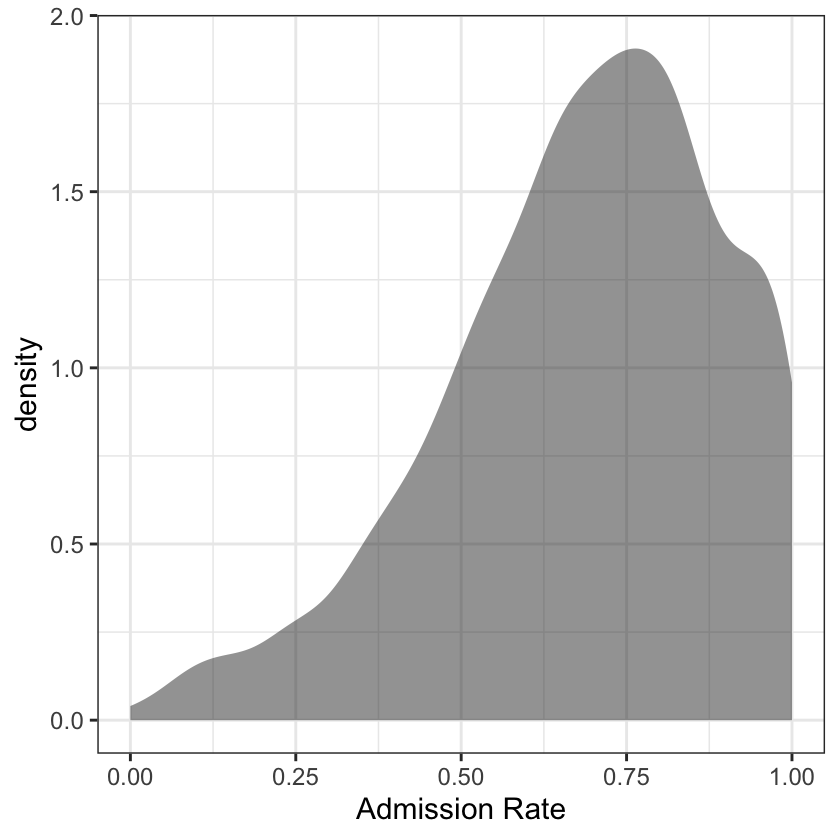

In [2]:
gf_density(~ adm_rate, data = college) %>%
  gf_labs(x = "Admission Rate")

Warning message:
"Removed 5769 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 5769 rows containing missing values (geom_point)."


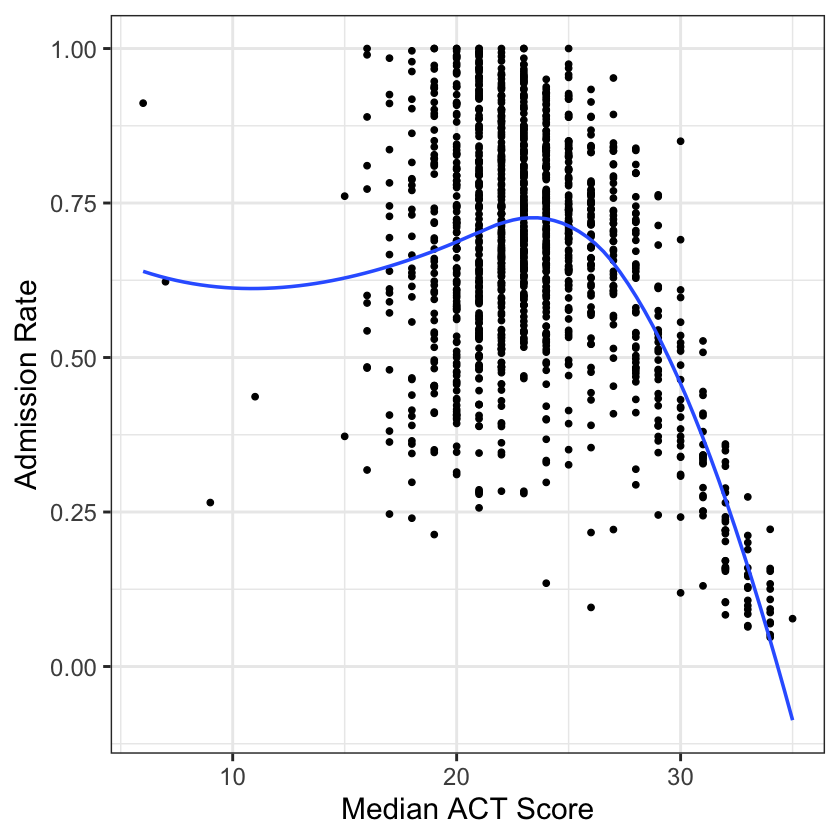

In [4]:
gf_point(adm_rate ~ actcmmid, data = college) %>%
  gf_smooth(method = 'loess') %>%
  gf_labs(x = "Median ACT Score",
          y = "Admission Rate")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"Removed 5039 rows containing non-finite values (stat_density)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 5769 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 5236 rows containing missing values"
Warning message:
"Removed 5769 rows containing missing values (geom_point)."
Warning message:
"Removed 5769 rows containing non-finite values (stat_density)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 5777 rows containing missing values"
Warning message:
"Removed 5236 rows containing missing values (geom_point)."
Warning message:
"Removed 5777 rows containing missing values (geom_point)."
Warning message:
"Removed 3486 rows containing non-finite values (stat_density)."


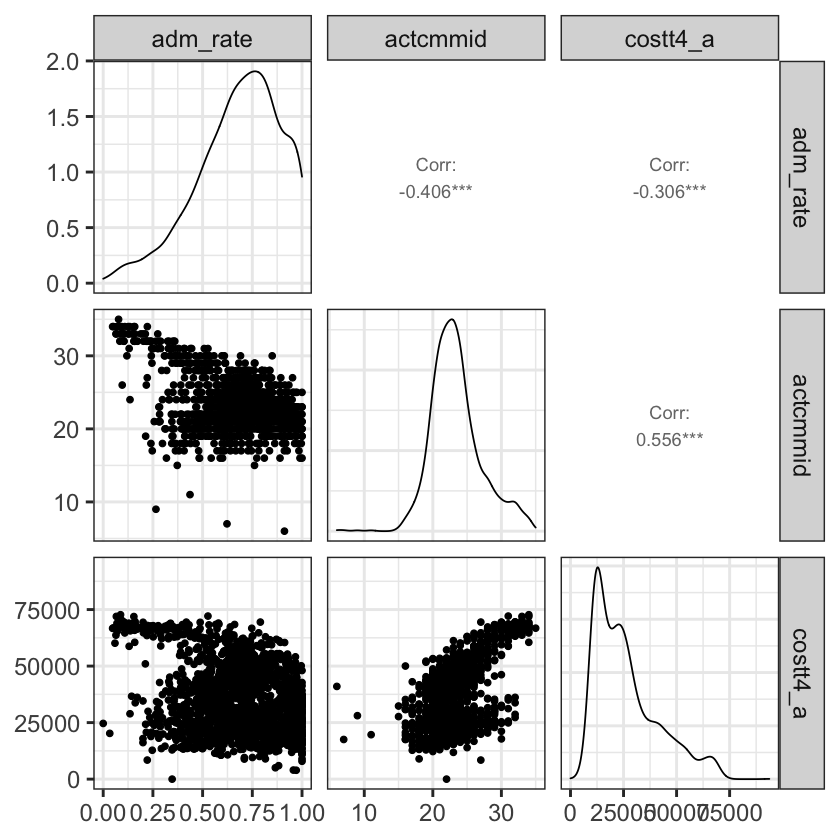

In [5]:
library(GGally)

ggpairs(college[c('adm_rate', 'actcmmid', 'costt4_a')])

Let's now fit a multiple regression model. 

In [6]:
adm_mult_reg <- lm(adm_rate ~ actcmmid + costt4_a, data = college)

summary(adm_mult_reg)


Call:
lm(formula = adm_rate ~ actcmmid + costt4_a, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65484 -0.12230  0.02291  0.13863  0.37054 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.135e+00  3.326e-02  34.130  < 2e-16 ***
actcmmid    -1.669e-02  1.650e-03 -10.114  < 2e-16 ***
costt4_a    -2.304e-06  4.047e-07  -5.693 1.55e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1813 on 1278 degrees of freedom
  (5777 observations deleted due to missingness)
Multiple R-squared:  0.1836,	Adjusted R-squared:  0.1824 
F-statistic: 143.8 on 2 and 1278 DF,  p-value: < 2.2e-16


This model is now the following form:

$$
Admission\ Rate = 1.1 + -0.017 ACT + -0.000002 cost + \epsilon
$$

1. Why are these parameter estimates so small? 
2. How well is the overall model doing? 
3. Are both terms important in understanding variation in admission rates? How can you tell?

## Variance decomposition

Ultimately, multiple regression is a decomposition of variance. Recall, 

$$ 
\sum (Y - \bar{Y})^2 =  \sum (\hat{Y} - \bar{Y})^2 + \sum (Y - \hat{Y})^2  \\[10pt]
SS_{Total} = SS_{Regression} + SS_{Error}
$$

Multiple regression still does this, but now, there are two attributes going into helping explain variation in the regression portion of the variance decomposition. How is this variance decomposed by default? For linear regression, the variance decomposition is commonly done using type I sum of square decomposition. What does this mean? Essentially, this means that additional terms are added to determine if they help explain variation over and above the other terms in the model. This is a conditional variance added. For example, given the model above, the variance decomposition could be broken down into the following.

$$
SS_{Total} = SS_{Regression} + SS_{Error}   \\[10pt]
SS_{Total} = SS_{X_{1}} + SS_{X_{2} | X_{1}} + SS_{Error}
$$

In [7]:
act_lm <- lm(adm_rate ~ actcmmid, data = college)

summary(act_lm)


Call:
lm(formula = adm_rate ~ actcmmid, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71615 -0.12521  0.02024  0.14490  0.37314 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.180914   0.032988   35.80   <2e-16 ***
actcmmid    -0.022162   0.001391  -15.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1844 on 1287 degrees of freedom
  (5769 observations deleted due to missingness)
Multiple R-squared:  0.1647,	Adjusted R-squared:  0.1641 
F-statistic: 253.8 on 1 and 1287 DF,  p-value: < 2.2e-16


In [9]:
anova(act_lm)
anova(adm_mult_reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
actcmmid,1,8.635149,8.63514866,253.8432,2.680473e-52
Residuals,1287,43.780718,0.03401765,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
actcmmid,1,8.386099,8.38609900,255.09241,1.703696e-52
costt4_a,1,1.065494,1.06549390,32.41071,1.546449e-08
Residuals,1278,42.013930,0.03287475,NA,NA


[1] 15.97154

In [10]:
cost_lm <- lm(adm_rate ~ costt4_a, data = college)

summary(cost_lm)
anova(cost_lm)


Call:
lm(formula = adm_rate ~ costt4_a, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72108 -0.12656  0.02474  0.14459  0.38059 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.233e-01  1.151e-02   71.52   <2e-16 ***
costt4_a    -4.147e-06  3.022e-07  -13.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1965 on 1820 degrees of freedom
  (5236 observations deleted due to missingness)
Multiple R-squared:  0.0938,	Adjusted R-squared:  0.09331 
F-statistic: 188.4 on 1 and 1820 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
costt4_a,1,7.278057,7.27805737,188.3973,7.165793e-41
Residuals,1820,70.309213,0.03863144,NA,NA
